# Complex Networks - 5

#### 1) Implemente a simulação de crescimento de rede por anexação aleatória: comece com uma rede inicial e a cada passo acrescente um novo nó, com grau k (k fixo ou extraído de um sorteio) que deve se ligar a k nós previamente existentes com probabilidade uniforme.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import warnings
warnings.filterwarnings('ignore')

In [8]:
# Questão 1)

# K = 1
def evolution_network(G,I):
    for i in range(I):
        existing_nodes = np.unique(G)
        new_node = max(existing_nodes) + 1
        size = len(existing_nodes) - 1
        u = np.random.randint(size)
        to_connect = existing_nodes[u]
        G = np.append(G,[[new_node,to_connect]],axis = 0)
    return G

# Select K
def evolution_network_select_k(G,I,k):
    for i in range(I):
        existing_nodes = np.unique(G)
        new_node = max(existing_nodes) + 1
        size = len(existing_nodes) - 1
        for j in range(k-1):
            u = np.random.randint(size)
            to_connect = existing_nodes[u]
            G = np.append(G,[[new_node,to_connect]],axis = 0)
    return G

# Random K
def evolution_network_random_k(G,I):
    for i in range(I):
        existing_nodes = np.unique(G)
        new_node = max(existing_nodes) + 1
        size = len(existing_nodes) - 1
        k = np.random.randint(size)
        for j in range(k):
            u = np.random.randint(size)
            to_connect = existing_nodes[u]
            G = np.append(G,[[new_node,to_connect]],axis = 0)
    return G

# Network Histogram
def network_histogram(G):
    a = G[:,1]
    G = np.delete(G,a)
    G = np.append(G,a)
    plt.hist(G)
    plt.show()
    
def network_histogram_2(G):
    a = G[:,1]
    G = np.delete(G,a)
    G = np.append(G,a)
    sns.distplot(G, hist = False)
    plt.show()

#### 2) Use o item anterior para criar uma rede com 5000 nós por anexação aleatória e faça um histograma dos graus. Verifique que uma distribuição exponencial se ajusta bem ao histograma.

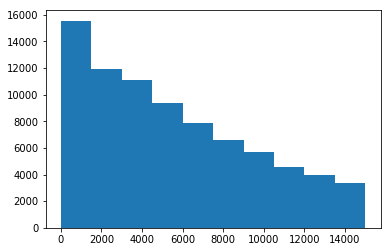

In [63]:
network_histogram(G)

#### 3) Justifique a aderência da distribuição exponencial no item anterior. Ou seja, mostre que o histograma converge para a função exponencial (histograma converge? Como??)

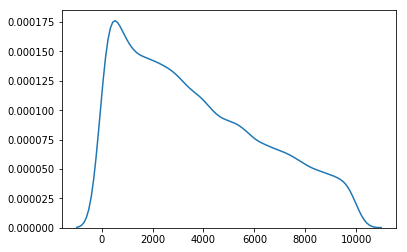

In [59]:
network_histogram_2(G)

#### 4) Repita o exercício (1) mas com anexação preferencial (modelo de Price que generaliza o de Albert-Barabasi). Agora o novo nó que entra na rede tem probabilidade 𝛼 de se ligar aos anteriores por anexação aleatória e probabilidade 1 − 𝛼 de se ligar aos anteriores por anexação preferencial (isto é, a probabilidade do nó ser escolhido é proporcional ao seu grau). O valor de 𝛼 é um parâmetro da simulação (pode ser 0, para a anexação preferencial pura).

In [6]:
# Questão 4)

def evolution_network_price_barabsi(G,I,k,alpha):
    for i in range(I):
        existing_nodes = np.unique(G)
        new_node = max(existing_nodes) + 1
        size = len(existing_nodes) - 1
        m = np.random.binomial(1,alpha, size = 1)
        m = np.asscalar(m)
        if m == 0:
            a = G[:,1]
            b = G[:,0]
            z = np.append(a,b)
            for j in range(k-1):
                u = np.random.choice(z)
                to_connect = existing_nodes[u]
                G = np.append(G,[[new_node,to_connect]],axis = 0) 
        else:
            for j in range(k-1):
                u = np.random.randint(size)
                to_connect = existing_nodes[u]
                G = np.append(G,[[new_node,to_connect]],axis = 0)
    return G

#### 5) Use o item anterior para criar uma rede com 5000 nós por anexação preferencial e faça um histograma dos graus. Verifique que uma lei de potência se ajusta bem ao histograma.

In [7]:
G = evolution_network_price_barabsi(G,5000,3,0.3)

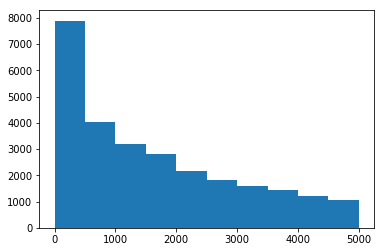

In [9]:
network_histogram(G)

#### 6) Justifique a aderência da distribuição de pareto no item anterior. Ou seja, mostre que o histograma converge para uma lei de potência (histograma converge? Como??)

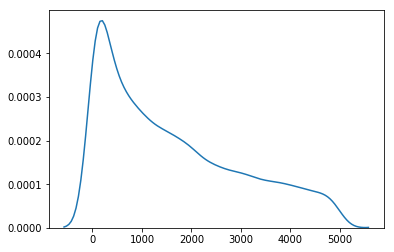

In [10]:
network_histogram_2(G)